# Linear Regression Example
## Predicting demand for shared bikes

#### Problem Statement:

The problem is about predicting demand for shared bikes on various environmental and seasonal settings. Use this data to understand the factors affecting the demand for bikes and come up with a business plan to accelerate the revenue and come up with a business strategy to meet the demand levels and meet the customer's expectations

# The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file using pandas
bike=pd.read_csv("day.csv")


In [3]:
# Check first 5 records in dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Let's look at the number of rows and columns in the dataset
bike.shape

(730, 16)

In [5]:
#Summary of the dataset: 730 rows, 16 columns, no null values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Getting insights of the features
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Understanding the feature names in the dataset
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Data Handling and Cleaning

### Missing value check

In [8]:
#Find percentage of null values in each column

100*bike.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

-   We can see that there are no missing values present so no need for missing value treatment

### Remove columns that are not required:
- Our aim for this assignment is to predict the final count (irrespective of casual & registered count) and casual + registered   together comprises cnt
- As these columns are not required, we will go ahead dropping these.
- Also instant is redundant variable,l so we can drop it
- As we have year and months columns already, we can also drop dteday

In [9]:
#dropping 'instant','dteday','casual','registered' columns
# drop index' and 'dteday' column as they of not any use to us for the analysis
bike=bike.drop(['instant','dteday','casual','registered'],axis=1)
bike.shape

(730, 12)

#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [10]:
# Assigning string values to different seasons, weathersit, month, weekday instead of numeric values. These numeric values may misindicate some order to it.

bike['season']=bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['weathersit']=bike['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'})
bike['mnth']=bike['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday']=bike['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
bike['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# year (0: 2018, 1:2019)
bike['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [13]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
bike['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
July    62
Mar     62
May     62
Oct     62
Apr     60
June    60
Nov     60
Sep     60
Feb     56
Name: mnth, dtype: int64

In [14]:
# whether day is a holiday or not (0: No, 1: Yes)
bike['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
bike['weekday'].astype('category').value_counts()

Monday       105
Saturday     105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

In [16]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
bike['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

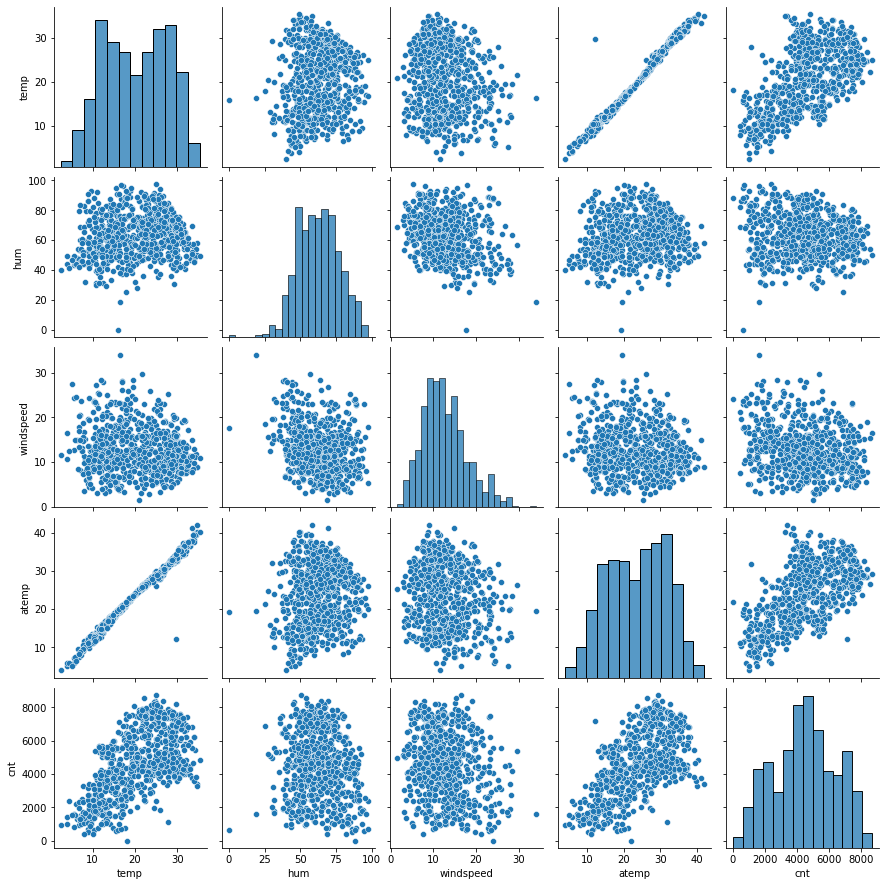

In [17]:
#visualising numeric variables
sns.pairplot(bike, vars=["temp", "hum",'windspeed','atemp','cnt'])
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

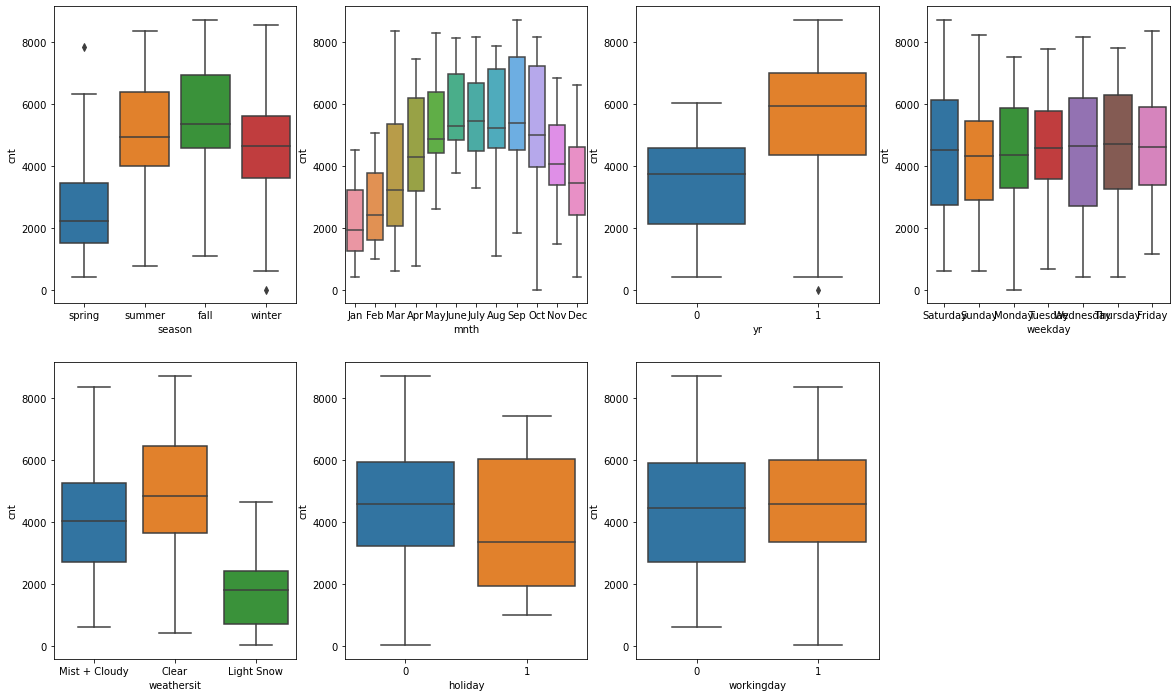

In [18]:
#visuaizing categorial variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()


We dont see any outliers, so outlier treatment is not required

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [19]:
# Correlation matrix
cor = bike.corr()
cor

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

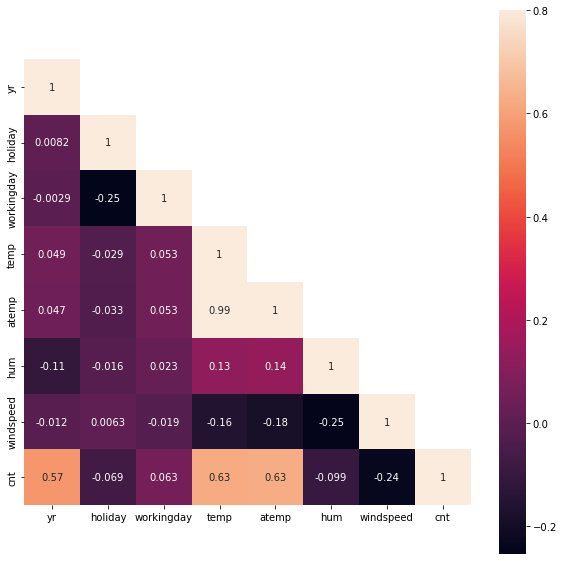

In [20]:
# Let's plot the correlations on a heatmap for better visualisation
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

while building the model, we'll have to pay attention to multicollinearity.

In [21]:
#removing atemp as it is highly correlated with temp
bike.drop('atemp',axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [22]:
# Convert into dummies
months_df=pd.get_dummies(bike.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike.season,drop_first=True)

In [23]:
# Concatenate dummy variables with the original dataframe
bike = pd.concat([bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [24]:
# Drop categorical variable columns
bike=bike.drop(['mnth','weekday','weathersit','season'],axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [25]:
# Split the dataframe into train and test sets
df_train, df_test=train_test_split(bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [26]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,72.9583,14.707907,1683,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,65.9583,8.666718,7261,1,0,0,...,0,0,1,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,0,0,1,...,0,0,0,0,1,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,1,0,...,1,0,0,0,0,0,1,0,0,1
79,0,0,1,17.647835,73.7391,19.348461,2077,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [27]:
#rescaloing
#min max scaling-preferred
#Create instance and fit on data
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


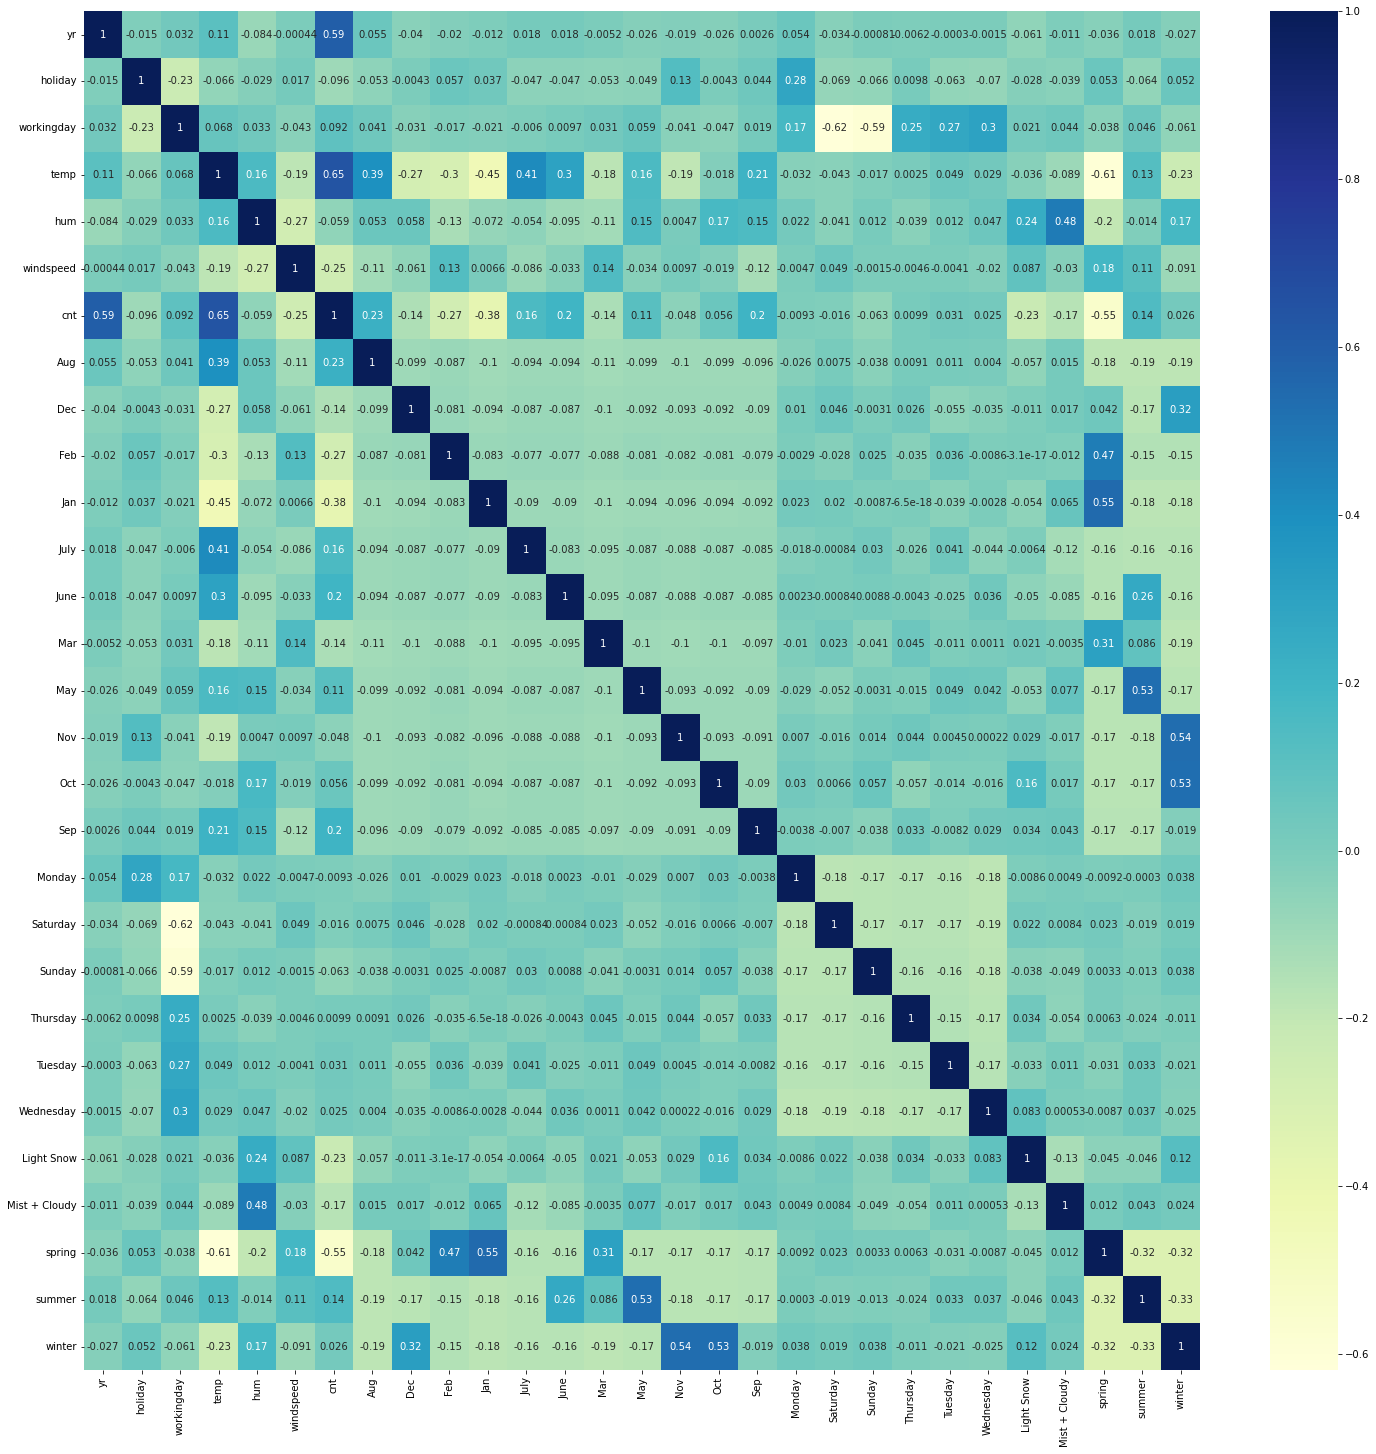

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

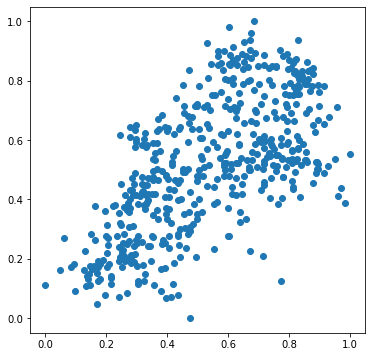

In [30]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [31]:
#xtrain, ytrainabs
y_train=df_train.pop('cnt')
X_train=df_train

In [32]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
X_train.shape

(510, 28)

### Building the first model with all the features

Let's now build our first model with all the features.
Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [34]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Monday          -0.020931
Saturday         0.095554
Sunday           0.041333
Thursday        -0.009131
Tuesday         -0.017931
Wednesday       -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [35]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23243754 -0.05073413  0.03540022  0.44535871 -0.15147327 -0.18601045
  0.02037626 -0.04427668 -0.03244123 -0.06331466 -0.03384783  0.00460238
  0.00127429  0.02467305 -0.03987901  0.007546    0.08593786 -0.02093099
  0.03477707 -0.01944316 -0.0091306  -0.01793105 -0.0054951  -0.25583483
 -0.05955091 -0.04483403  0.04300172  0.10763159]
0.3038828028681898


In [37]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.00e-181
Time:                        10:35:57   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Monday           -0.0209      0.015     -1.365      0.173      -0.051       0.009
Saturday          0.0956      0.014      6.958      0.000       0.069       0.123
Sunday            0.0413      0.014      2.964      0.003       0.014       0.069
Thursday         -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tuesday          -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wednesday        -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.88e+15
================================================================

This model has an Adjusted R-squared value of 84.4% which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [38]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select =15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True  True  True  True  True  True False False False  True  True False
 False False False False  True False  True False False False False  True
  True  True  True  True]
[ 1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 12  1  8  1  7 10  9 11  1
  1  1  1  1]


In [39]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Jan,July,Sep,Saturday,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0


In [40]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.22e-191
Time:                        10:35:57   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969

Note that the new model built on the selected features accuracy is same in comparison to the model which was built on all the features. It is **84.4%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [41]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
a=X_train_rfe1.drop('const',axis=1)

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist + Cloudy,2.29
0,yr,2.09
9,Saturday,1.98


## building model with 7 features and checking accuracy

In [44]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select = 7)

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True False  True  True  True False False False False False False
 False False False False False False False False False False False  True
 False False False  True]
[ 1  1  8  1  1  1 14 11 12  9  4 21 22 13 10 20  2 16  7 15 18 17 19  1
  6  5  3  1]


In [45]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,Light Snow,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0


In [46]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     281.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.78e-169
Time:                        10:35:58   Log-Likelihood:                 445.46
No. Observations:                 510   AIC:                            -874.9
Df Residuals:                     502   BIC:                            -841.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2575      0.028      9.038      0.0

Now let's check the VIF for these selected features and decide further.

In [47]:
b=X_train_rfe2.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.80
2,temp,6.87
4,windspeed,3.42
0,yr,2.01
6,winter,1.48
5,Light Snow,1.08
1,holiday,1.03


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [48]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,Light Snow,winter
576,1.0,1,0,0.815169,0.264686,0,0
426,1.0,1,0,0.442393,0.255342,0,0
728,1.0,1,0,0.245101,0.663106,0,0
482,1.0,1,0,0.395666,0.188475,0,0
111,1.0,0,0,0.345824,0.380981,0,0
...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0
53,1.0,0,0,0.202618,0.111379,0,0
350,1.0,0,0,0.248216,0.431816,0,1
79,1.0,0,0,0.462664,0.529881,0,0


In [49]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     292.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.93e-160
Time:                        10:35:58   Log-Likelihood:                 421.78
No. Observations:                 510   AIC:                            -829.6
Df Residuals:                     503   BIC:                            -799.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1008      0.018      5.481      0.0

The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [50]:
c=X_train_rfe2.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.07
3,windspeed,2.81
0,yr,2.00
5,winter,1.24
4,Light Snow,1.06
1,holiday,1.03


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.4%` with **16 variables** to just `77.5%` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [51]:
y_train_cnt = lm3.predict(X_train_rfe2)


Text(0.5, 0, 'Errors')

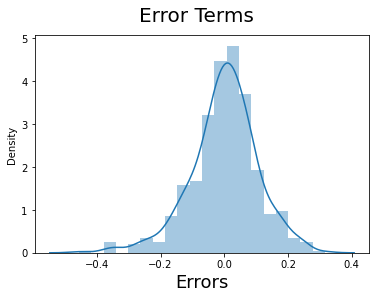

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [53]:
X_train_rfe2

,const,yr,holiday,temp,windspeed,Light Snow,winter
576,1.0,1,0,0.815169,0.264686,0,0
426,1.0,1,0,0.442393,0.255342,0,0
728,1.0,1,0,0.245101,0.663106,0,0
482,1.0,1,0,0.395666,0.188475,0,0
111,1.0,0,0,0.345824,0.380981,0,0
...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0
53,1.0,0,0,0.202618,0.111379,0,0
350,1.0,0,0,0.248216,0.431816,0,1
79,1.0,0,0,0.462664,0.529881,0,0


In [54]:
var = ['temp', 'hum', 'windspeed','cnt']
df_test[var] = scaler.transform(df_test[var])

In [55]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [57]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'Light Snow', 'winter'], dtype='object')

In [58]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [59]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   temp        220 non-null    float64
 4   windspeed   220 non-null    float64
 5   Light Snow  220 non-null    uint8  
 6   winter      220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(2)
memory usage: 10.7 KB


In [60]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

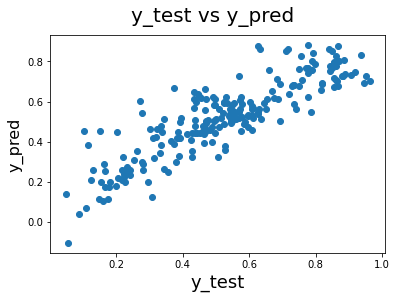

In [61]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [62]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7518412352015954

Thus, for the model with 6 variables, the r-squared on training and test data is about 77.7% and 75.18% respectively. The adjusted r-squared on the train set is about is about 77.5%.

In [63]:
round(lm3.params,4)

const         0.1008
yr            0.2328
holiday      -0.0877
temp          0.6009
windspeed    -0.1377
Light Snow   -0.2504
winter        0.1025
dtype: float64

We can see that the equation of our best fitted line is:

cnt= 0.1008 + 0.2328 x yr -0.0877 x holiday + 0.6009 x temp - 0.1377 x windspeed - 0.2504 x Light Snow + 0.1025 x winter

#### Checking the correlations between the final predictor variables

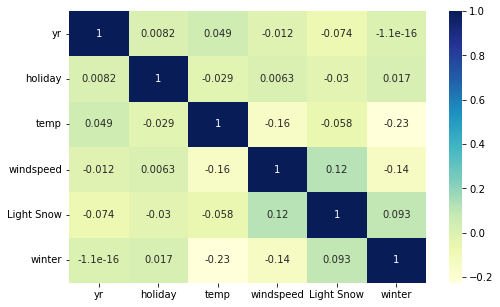

In [64]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations.

Demand of bikes depend on year, holiday, temp, windspeed,  Light_snowrain, and winter.

Analysing the above model, the comapany should focus on the following features:
Company should focus on expanding business during holidays.
Company should focus on expanding business during Light Snow.
Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
Conclusion

Significant variables to predict the demand for shared bikes

- holiday
- temp
- windspeed
- Season (winter)
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)